In [1]:
from samana.Data.j1042 import J1042_HST_160W
from samana.Model.j1042_model import J1042ModelEPLM3M4Shear, J1042ModelEPLM3M4Shear2src
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Data.coord_transforms import Coordinates


/var/folders/8v/kc3z7kcx6nggk5cd5q1_ltfc0000gn/T/ipykernel_21994/3989448295.py:4: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(image_data),origin='lower',vmin=-0.9)


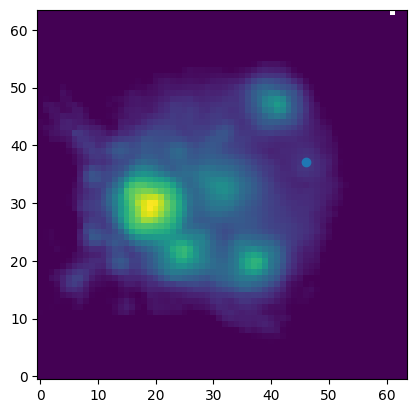

In [2]:
data = J1042_HST_160W()
image_data = data.kwargs_data['image_data']

plt.imshow(np.log10(image_data),origin='lower',vmin=-0.9)
xpix, ypix = data.coordinate_system.map_coord2pix(-0.9, 0)
plt.scatter(xpix, ypix)


In [3]:
data = J1042_HST_160W()
model = J1042ModelEPLM3M4Shear2src(data, shapelets_order=5)
kwargs_lens_macro_init = None

kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
print(kwargs_model)
fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  model.kwargs_likelihood, kwargs_params, verbose=True)
nthreads = 10
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a', 'a1_a'], [0.0, 0.0, 0.0]]]}],
        #['update_settings', {'lens_add_fixed': [[0, ['gamma'], [2.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 20, 'n_iterations': 200, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['update_settings', {'source_add_fixed': [[1, ['n_max'], [16]]]}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 150, 'threadCount': nthreads}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['MCMC', {'n_burn': 100, 'n_run': 25, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()
print(fitting_sequence.best_fit_likelihood(verbose=True))

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(


{'lens_model_list': ['EPL_MULTIPOLE_M1M3M4_ELL', 'SHEAR', 'SIS'], 'lens_redshift_list': [0.59, 0.59, 0.59], 'multi_plane': True, 'decouple_multi_plane': False, 'z_source': 2.5, 'kwargs_lens_eqn_solver': {'arrival_time_sort': False}, 'source_light_model_list': ['SERSIC_ELLIPSE', 'SHAPELETS', 'SERSIC'], 'lens_light_model_list': ['SERSIC_ELLIPSE', 'SERSIC_ELLIPSE'], 'point_source_model_list': ['LENSED_POSITION'], 'additional_images_list': [False], 'fixed_magnification_list': [False], 'observed_convention_index': None, 'cosmo': None}


/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Computing the PSO ...


  0%|                                                                                                                                                                                                                                                        | 0/200 [00:00<?, ?it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the 

Max iteration reached! Stopping.
-2.1319532015788654 reduced X^2 of best position
-3230.9750769927705 log likelihood
3031 effective number of data points
[{'theta_E': 0.8885744112669923, 'gamma': 2.075887173525337, 'e1': -0.21353185461803328, 'e2': 0.15349207678513735, 'center_x': 0.01517016820503356, 'center_y': 0.03775160545451153, 'a1_a': 0.0, 'delta_phi_m1': 0.2095870495534645, 'a3_a': 0.0, 'delta_phi_m3': 0.520085512556773, 'a4_a': 0.0, 'delta_phi_m4': -0.01489036961271982}, {'gamma1': -0.08061166939597812, 'gamma2': 0.0035487898900232843, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.061074899507109565, 'center_x': 1.8476147392897098, 'center_y': -0.37062873083547876}] lens result
[{'amp': 1, 'R_sersic': 0.34456313219073337, 'n_sersic': 5.4429555254660125, 'e1': 0.08765121300971825, 'e2': -0.02651056688265239, 'center_x': -0.014644315256615524, 'center_y': 0.08321145088870052}, {'amp': 1, 'n_max': 5, 'beta': 0.12824815649118146, 'center_x': -0.014644315256615524, 'center_y': 0.083211


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)


-2.0539407815004385 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.0539407815003976
(36, ['gamma_lens0', 'delta_phi_m1_lens0', 'delta_phi_m3_lens0', 'delta_phi_m4_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_source_light2', 'n_sersic_source_light2', 'center_x_source_light2', 'center_y_source_light2', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1', 'n_sersic_lens_light1', 'e1_lens_light1', 'e2_lens_light1', 'center_x_lens_light1', 'center_y_lens_light1', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


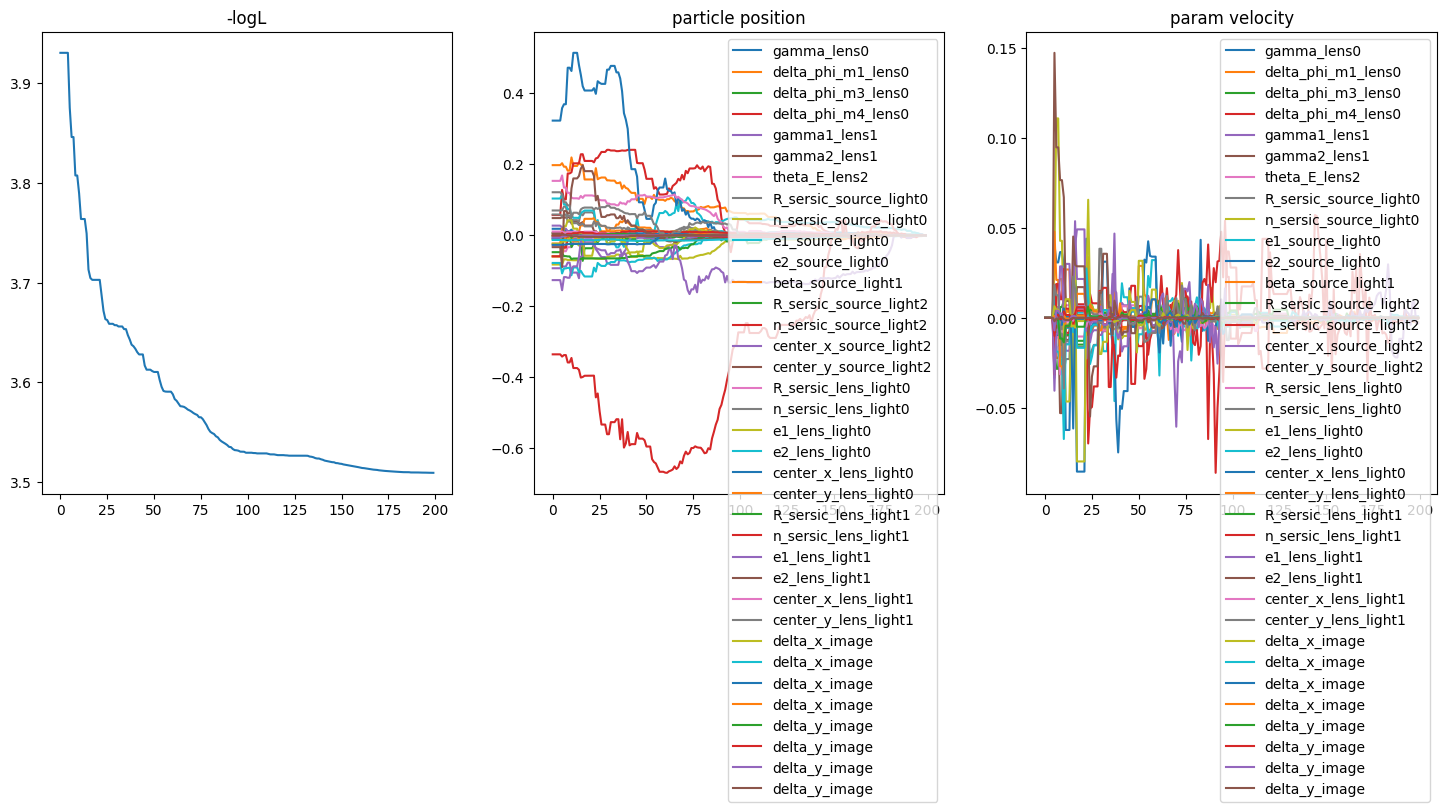

<Figure size 640x480 with 0 Axes>

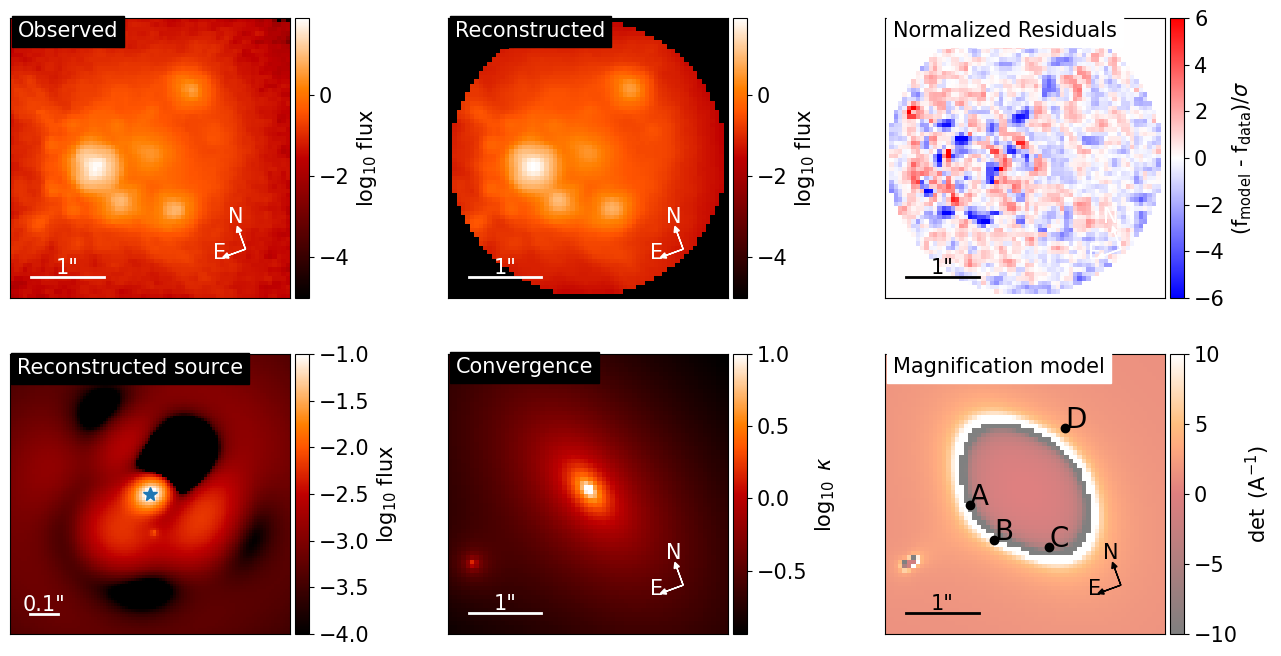

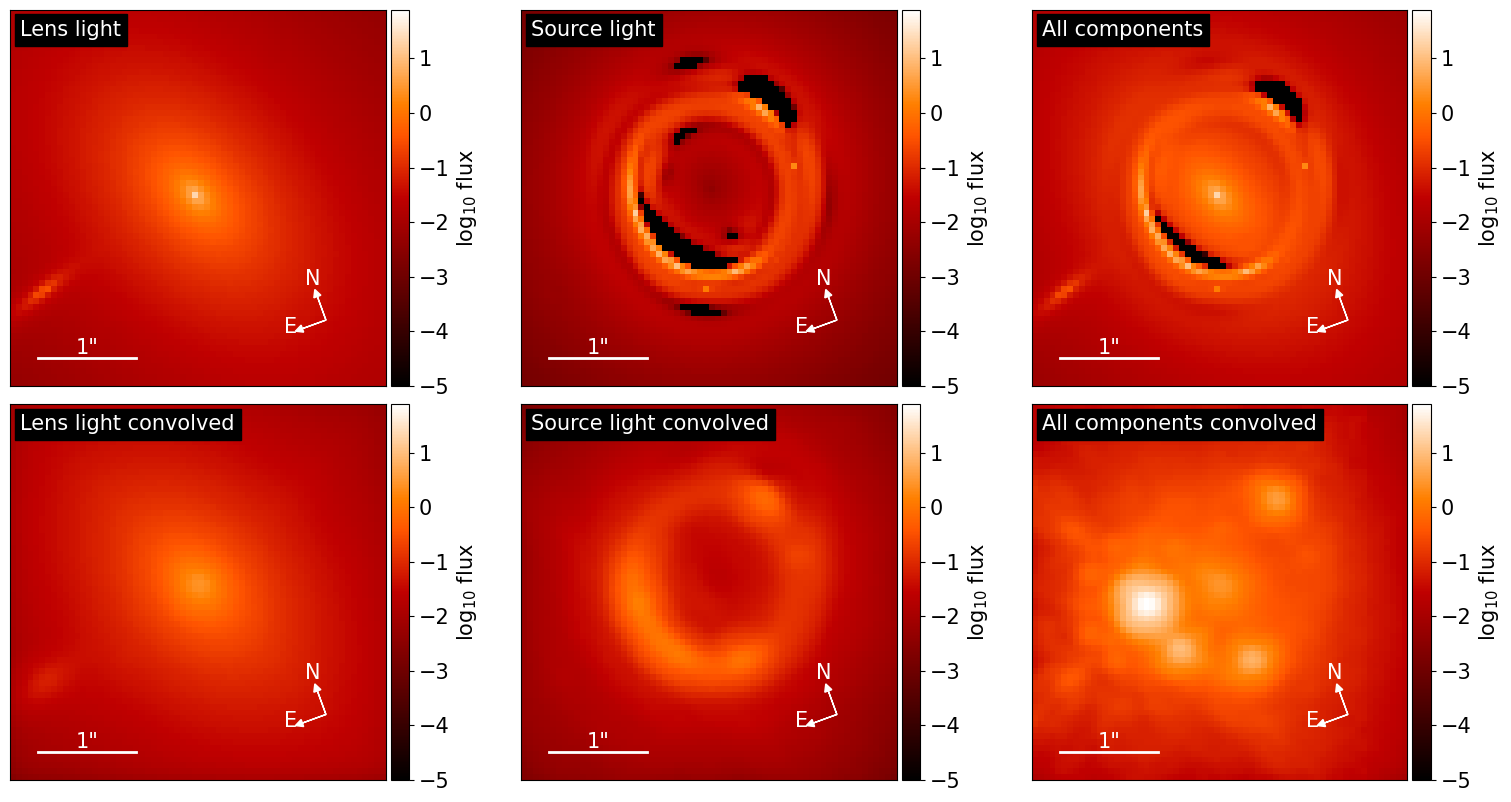

[{'theta_E': 0.8885744112669923, 'gamma': 2.075887173525337, 'e1': -0.21353185461803328, 'e2': 0.15349207678513735, 'center_x': 0.01517016820503356, 'center_y': 0.03775160545451153, 'a1_a': 0.0, 'delta_phi_m1': 0.2095870495534645, 'a3_a': 0.0, 'delta_phi_m3': 0.520085512556773, 'a4_a': 0.0, 'delta_phi_m4': -0.01489036961271982}, {'gamma1': -0.08061166939597812, 'gamma2': 0.0035487898900232843, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.061074899507109565, 'center_x': 1.8476147392897098, 'center_y': -0.37062873083547876}]
[{'amp': 16.679899941710097, 'R_sersic': 0.34456313219073337, 'n_sersic': 5.4429555254660125, 'e1': 0.08765121300971825, 'e2': -0.02651056688265239, 'center_x': -0.014644315256615524, 'center_y': 0.08321145088870052}, {'amp': array([-278.69885445,   56.29745109,  -65.63640149,   16.94069071,
         47.28401653,   59.40728345,  -23.9485725 ,  -36.48256846,
        -24.2000779 ,   24.47180733,  -25.22088727,   -2.55639656,
        -25.32206199,   -9.65624232,  -46.85388

In [4]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt
# relax joint with point source assumption
multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100, v_min=-4, v_max=-1)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

#print(kwargs_result)
print(kwargs_result['kwargs_lens'])
print(kwargs_result['kwargs_source'])
print('lens light: ', kwargs_result['kwargs_lens_light'])

from lenstronomy.LensModel.lens_model import LensModel
lens_model = LensModel(kwargs_model['lens_model_list'], 
                      lens_redshift_list=kwargs_model['lens_redshift_list'], 
                      multi_plane=kwargs_model['multi_plane'], 
                      z_source=kwargs_model['z_source'])

ximg, yimg = data.x_image, data.y_image
m = np.absolute(lens_model.magnification(ximg, yimg, kwargs_result['kwargs_lens']))
#print('best fit flux ratios with satellite: ', m_satellite[1:]/m_satellite[0])
print('best fit flux ratios: ', m[1:]/m[0])
print('measured flux ratios: ', np.array([0.315, 0.115, 0.076]))

In [5]:
# get relative flux from deflector and satellite 

from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.Analysis.light_profile import LightProfileAnalysis
light_model = LightModel(['SERSIC_ELLIPSE']*2)
analysis = LightProfileAnalysis(light_model)

fluxes = analysis.flux_components(kwargs_result['kwargs_lens_light'])[0]
theta_E_2 = 0.9 * (fluxes[1] / fluxes[0]) ** 0.5

print(theta_E_2)

0.10519753901714991


-2.053940781500436 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.053940781500512


/var/folders/8v/kc3z7kcx6nggk5cd5q1_ltfc0000gn/T/ipykernel_21994/1919949636.py:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax2.plot(x_, y_, ".", color='m',markersize=12,alpha=1.,marker='+'


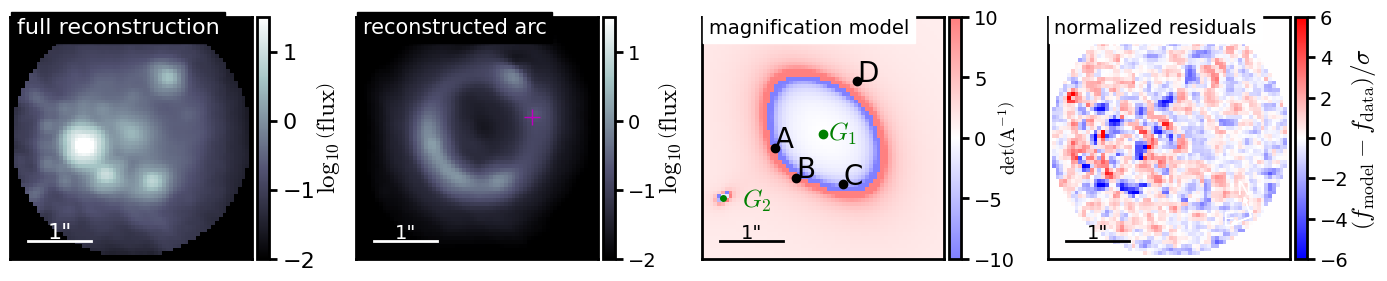

In [6]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -2.
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone',
                             font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

gxx = -0.892
gxy = -0.0085
xplot, yplot = data.coordinate_system.map_coord2pix(gxx, gxy)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax2.plot(x_, y_, ".", color='m',markersize=12,alpha=1.,marker='+'
        )

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_+0.08, y_-0.1, r'$G_1$', fontsize=18, color='g')

satx = kwargs_result['kwargs_lens'][2]['center_x']
saty = kwargs_result['kwargs_lens'][2]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=8,alpha=1.)
ax3.text(x_+0.3, y_-0.15, r'$G_2$', fontsize=18, color='g')


ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/1042bmodel.pdf',bbox_inches='tight')

median:  -186.87404753111878
standard dev:  47.54522054193852


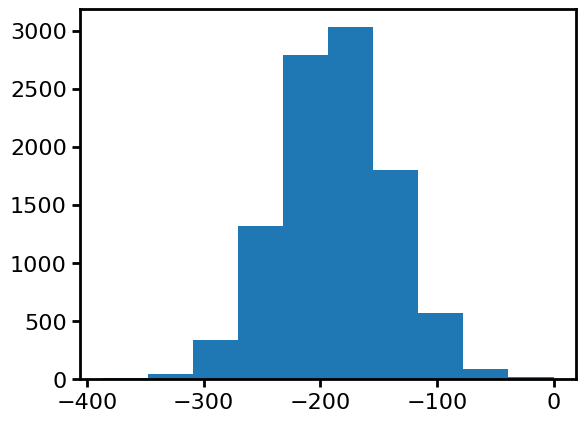

In [9]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )
logL_list = []
for i in range(0, 10000):
    poisson = image_util.add_poisson(image_sim_no_noise, exp_time=data.kwargs_data['exposure_time'])
    poisson = 0
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=data.kwargs_data['background_rms'])
    noise_map = bkg + poisson
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) - max_logL
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))